> This notebook serves as the exploration notebook for the metadata surrounding the images. Here I explore the distribution of types of lesions, ages, localizations and diagnosis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
data_1 = pd.read_csv("C:/Users/Vansh Aggarwal/Desktop/ai skin pro run/hmnist_8_8_L.csv")

In [4]:
data_2 = pd.read_csv("C:/Users/Vansh Aggarwal/Desktop/ai skin pro run/hmnist_8_8_RGB.csv")

In [5]:
data_3 = pd.read_csv("C:/Users/Vansh Aggarwal/Desktop/ai skin pro run/hmnist_28_28_L.csv")

In [6]:
data_4 = pd.read_csv("C:/Users/Vansh Aggarwal/Desktop/ai skin pro run/hmnist_28_28_RGB.csv")

In [7]:
data_info = pd.read_csv("C:/Users/Vansh Aggarwal/Desktop/ai skin pro run/HAM10000_metadata.csv")

In [8]:
data_info.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear


In [9]:
data_info.shape

(10015, 7)

In [10]:
data_1["label"].value_counts()

4    6705
6    1113
2    1099
1     514
0     327
5     142
3     115
Name: label, dtype: int64

In [11]:
data_info["dx"].value_counts()

nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: dx, dtype: int64

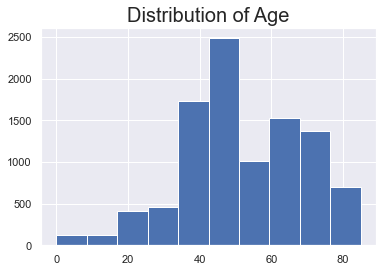

In [12]:
data_info["age"].hist()
plt.title("Distribution of Age", fontdict={"fontsize" : 20});

In [13]:
data_info["sex"].value_counts(normalize = True)

male       0.539790
female     0.454518
unknown    0.005691
Name: sex, dtype: float64

In [14]:
data_info["localization"].value_counts(normalize = True)

back               0.218872
lower extremity    0.207389
trunk              0.140190
upper extremity    0.111633
abdomen            0.102047
face               0.074388
chest              0.040639
foot               0.031852
unknown            0.023365
neck               0.016775
scalp              0.012781
hand               0.008987
ear                0.005592
genital            0.004793
acral              0.000699
Name: localization, dtype: float64

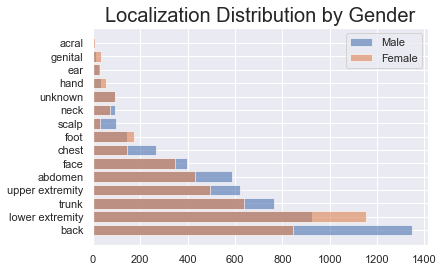

In [15]:
plt.barh(data_info[data_info["sex"] == "male"]["localization"].value_counts().index, 
         data_info[data_info["sex"] == "male"]["localization"].value_counts().values, alpha = 0.6, 
         label = "Male")

plt.barh(data_info[data_info["sex"] == "female"]["localization"].value_counts().index, 
         data_info[data_info["sex"] == "female"]["localization"].value_counts().values, alpha = 0.6,
         label = "Female")

plt.legend()
plt.title("Localization Distribution by Gender", fontdict={"fontsize": 20});

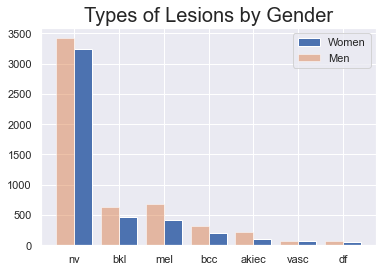

In [16]:
woman_mask = data_info["sex"] == "female"
man_mask = data_info["sex"] == "male"

fig1 = plt.figure()

plt.bar(data_info[woman_mask]["dx"].value_counts().index,
        data_info[woman_mask]["dx"].value_counts().values,
        width = 0.4,
        align = "edge",
        label = "Women")
plt.bar(data_info[man_mask]["dx"].value_counts().index,
        data_info[man_mask]["dx"].value_counts().values,
        width = -0.4,
        align = "edge",
        alpha = .5,
        label = "Men");
plt.title("Types of Lesions by Gender", fontdict= {"fontsize": 20})
plt.legend();
fig1.savefig("class_balance_by_gender.png")

In [17]:
data_4["pixel_avg"] = data_4.drop("label", axis = 1).sum(axis = 1)/2353

In [18]:
data_4[["pixel_avg", "label"]].groupby("label").mean()

,pixel_avg
label,
0,167.376187
1,171.105030
2,154.915364
3,169.605732
4,159.974369
5,169.787445
6,153.531468


In [19]:
data_info["pixel_avg"] = data_4["pixel_avg"]

In [20]:
data_info.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,pixel_avg
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,184.320017
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,177.003825
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,181.487038
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,165.210795
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,188.305992


In [21]:
data_info.to_csv("C:/Users/Vansh Aggarwal/Desktop/ai skin pro run/descriptive_data.csv")